# Explore suicide data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

['master.csv']


In [2]:
# Any results you write to the current directory are saved as output.

file = '../input/master.csv'

df = pd.read_csv(file)

print(df.shape)

(27820, 12)


In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df[['country', 'year']].nunique()

country    101
year        32
dtype: int64

In [5]:
df.groupby('sex').agg({'suicides_no': 'sum'})

,suicides_no
sex,
female,1559510
male,5188910


In [6]:
df.groupby(['sex', 'generation']).agg({'suicides_no': 'sum'})

suicides_no
sex    generation                  
female Boomers               460968
       G.I. Generation       176653
       Generation X          309839
       Generation Z            6141
       Millenials            133620
       Silent                472289
male   Boomers              1823530
       G.I. Generation       333356
       Generation X         1222965
       Generation Z            9765
       Millenials            489839
       Silent               1309455

In [8]:
d = df.groupby(['sex', 'year']).agg({'suicides/100k pop': 'mean'})

d.head()

suicides/100k pop
sex    year                   
female 1985           5.776910
       1986           5.812674
       1987           5.732130
       1988           6.323401
       1989           6.176827

In [11]:
d.reset_index().head()

,sex,year,suicides/100k pop
0,female,1985,5.776910
1,female,1986,5.812674
2,female,1987,5.732130
3,female,1988,6.323401
4,female,1989,6.176827


## Plots

In [9]:
plt.style.use('ggplot')

<Figure size 432x288 with 0 Axes>

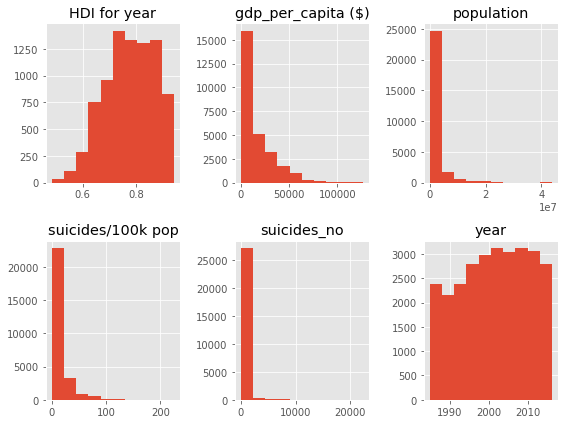

In [10]:
plt.figure()
df.hist(figsize=(8, 6), layout=(2, 3))
plt.tight_layout();

Text(0.5, 0.98, 'Suicides/100k Population')

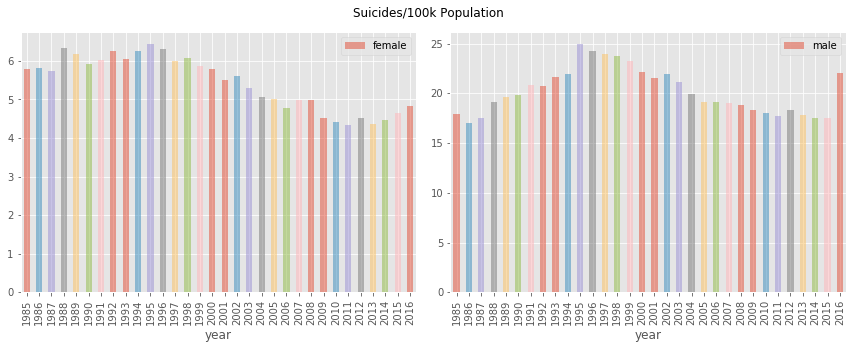

In [17]:
d = df.groupby(['sex', 'year']).agg({'suicides/100k pop': 'mean'})
d.reset_index(inplace=True)
female = d.loc[d['sex']=='female']
male = d.loc[d['sex']=='male']
f, ax = plt.subplots(ncols=2, figsize=(12, 5))
female.plot(kind='bar', x='year', y='suicides/100k pop', label='female', ax=ax[0], alpha=0.5)
male.plot(kind='bar', x='year', y='suicides/100k pop', label='male', ax=ax[1], alpha=0.5)
f.tight_layout(rect=[0, 0.02, 1, 0.95])
f.suptitle('Suicides/100k Population')

Text(0.5, 0.98, '')

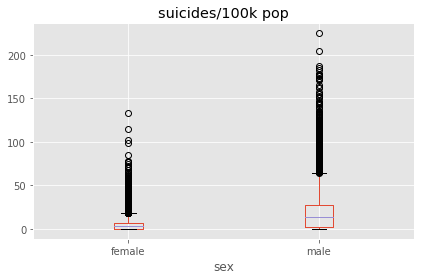

In [27]:
f, ax = plt.subplots()
df.boxplot(by='sex', column=['suicides/100k pop'], ax=ax)
f.tight_layout()
f.suptitle(None)

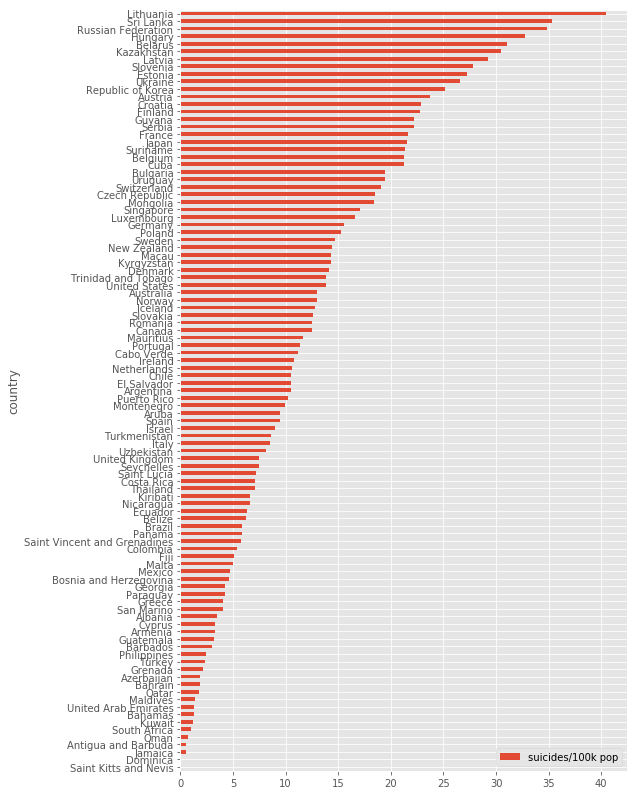

In [28]:
d = df.groupby('country').agg({'suicides/100k pop': 'mean'}).sort_values(by='suicides/100k pop')
f, ax = plt.subplots(figsize=(8, 14))
d.plot(kind='barh', ax=ax)

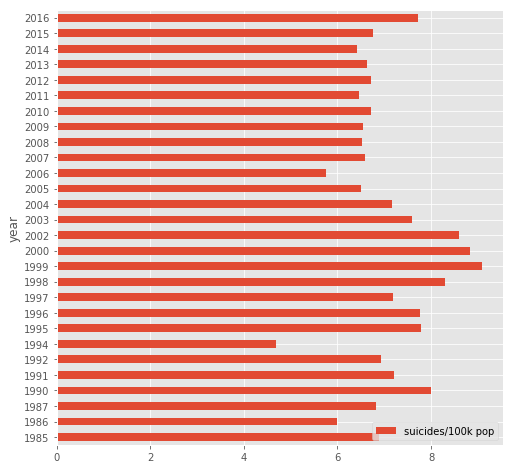

In [29]:
d = df[df['country']=='Thailand'].groupby('year').agg({'suicides/100k pop': 'mean'})
f, ax = plt.subplots(figsize=(8, 8))
d.plot(kind='barh', ax=ax)